# Binary Classification

#1, 탐색적 데이터 분석

In [ ]:
import pandas as pd

DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')
DF.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


In [ ]:
#DF=DF[['meanPriceEach','orderType_1','orderType_2','orderType_3','bundleType_1','bundleType_2','customerType']]
DF.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


In [ ]:
# x = DF['customerType']


# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# customerType = encoder.fit_transform(x)

# DF[['customerType']] = customerType
# DF.customerType.head(10)

0    1
1    0
2    0
3    1
4    1
5    0
6    1
7    0
8    1
9    0
Name: customerType, dtype: int64

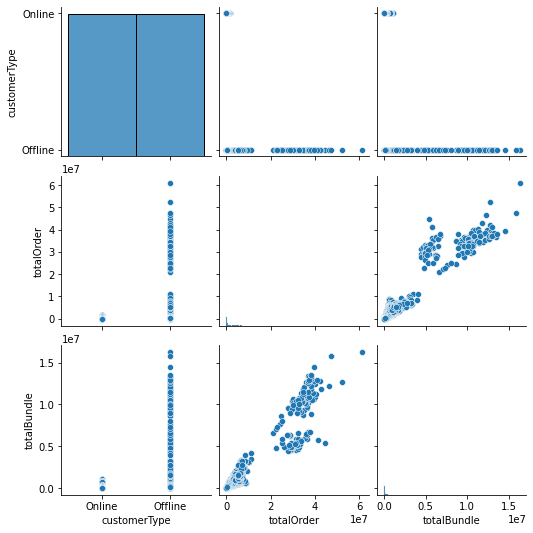

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(DF, x_vars=['customerType','totalOrder','totalBundle'], y_vars=['customerType','totalOrder','totalBundle'])
plt.show()

In [ ]:
DF.customerType.value_counts()

Offline    7506
Online     7503
Name: customerType, dtype: int64

boxplot 시각화

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


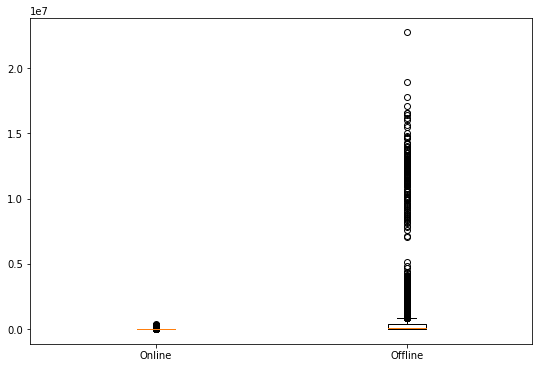

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.boxplot([DF[DF.customerType == 'Online'].orderType_1,
             DF[DF.customerType == 'Offline'].orderType_1],
            
            labels = ['Online', 'Offline'])
plt.show()

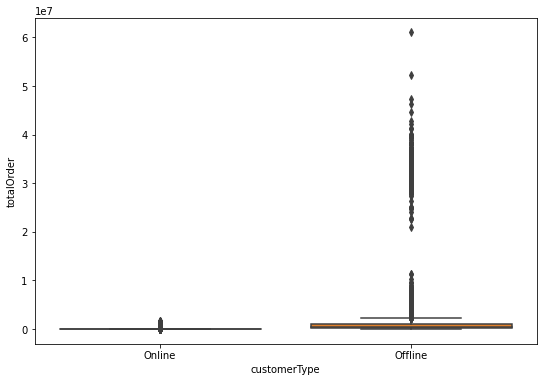

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x = 'customerType', y= 'totalOrder', data=DF)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


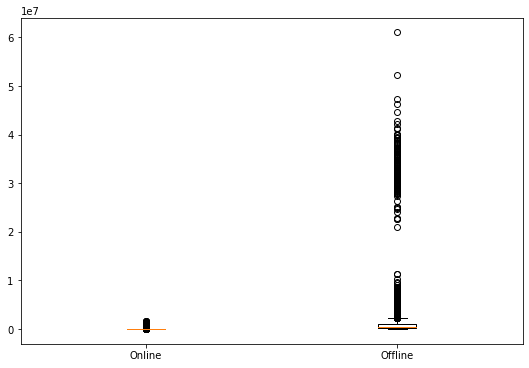

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.boxplot([DF[DF.customerType == 'Online'].totalOrder,
             DF[DF.customerType == 'Offline'].totalOrder],
            labels = ['Online', 'Offline'])
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


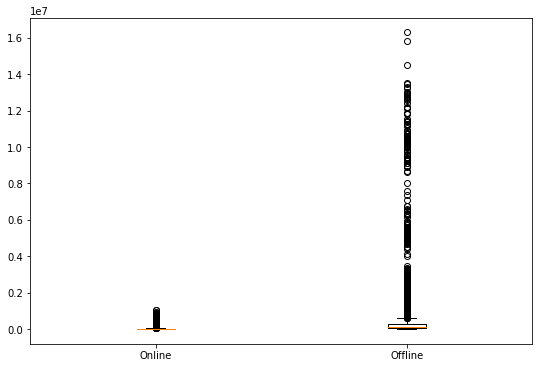

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.boxplot([DF[DF.customerType == 'Online'].totalBundle,
             DF[DF.customerType == 'Offline'].totalBundle],
            labels = ['Online', 'Offline'])
plt.show()

# 2, customerType vs. totalOrder


In [102]:
X=DF[['totalOrder']]
y=DF['customerType']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)
print('Train Data :', X_train.shape, y_train.shape)
print('Test Data :', X_test.shape, y_test.shape)

Train Data : (10506, 1) (10506,)
Test Data : (4503, 1) (4503,)


## 2) Modeling

In [103]:
from sklearn.linear_model import LogisticRegression


Model = LogisticRegression()
Model.fit(X_train, y_train)

y_hat = Model.predict(X_test)
y_hat

array(['Offline', 'Offline', 'Offline', ..., 'Offline', 'Offline',
       'Offline'], dtype=object)

## 3) confusion Matrix -labels=['Online, Offline] 
<p> 이게 꼭 필요한가? 

In [109]:
from sklearn.metrics import confusion_matrix

# positive = Online 기준
confusion_matrix(y_test, y_hat, labels=['Online','Offline'])

array([[2227,    0],
       [2276,    0]])

## 4) accuracy, precision, recall

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Online' )) # positive label = No 기준
print(recall_score(y_test, y_hat, pos_label = 'Online'))

0.4945591827670442
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Offline' )) # positive label = No 기준
print(recall_score(y_test, y_hat, pos_label = 'Offline'))

0.4945591827670442
0.4945591827670442
1.0


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'Online')

0.0

In [ ]:
f1_score(y_test, y_hat, pos_label = 'Offline')

0.6618127786032689

meanPriceEach

In [111]:
X=DF[['meanPriceEach']]
y=DF['customerType']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=2045)
print('Train Data :', X_train.shape, y_train.shape)
print('Test Data :', X_test.shape, y_test.shape)



from sklearn.linear_model import LogisticRegression


Model = LogisticRegression()
Model.fit(X_train, y_train)

y_hat = Model.predict(X_test)
y_hat

Train Data : (10506, 1) (10506,)
Test Data : (4503, 1) (4503,)


array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online',
       'Offline'], dtype=object)

In [112]:
Model.score(X_test, y_test)

0.8056850988230069

In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_hat)

array([[1806,  421],
       [ 454, 1822]])

In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Offline' )) # positive label = No 기준
print(recall_score(y_test, y_hat, pos_label = 'Offline'))

0.8056850988230069
0.7991150442477876
0.8109564436461607


In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(y_test, y_hat))
print(precision_score(y_test, y_hat, pos_label = 'Online' )) # positive label = No 기준
print(recall_score(y_test, y_hat, pos_label = 'Online'))

0.8056850988230069
0.8123049487293803
0.8005272407732865


meanPriceEach/ f1_score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_hat, pos_label = 'Online')

0.8063730913919008